# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arda Ardiyansyah
- **Email:** ardaardiansyah24@gmail.com
- **ID Dicoding:** arda24

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Lingkungan Terhadap Polusi?
- Stasiun mana yang paling sedikit polusi dan paling banyak polusi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from matplotlib.patches import Patch
import pickle

## Data Wrangling

### Gathering Data

In [2]:
directory = 'D:\\Downloads\\Air-quality-dataset\\PRSA_Data_20130301-20170228'

# empty list for dataframe to append
dfs = []

# read and append each data of csv(s) to a list named dfs
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(directory, filename))
        dfs.append(df)

# concat and create dataframe from dfs
combined_df = pd.concat(dfs, ignore_index=True)

combined_df = combined_df.drop(columns=['No'])

combined_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

Mengecek apakah jumlah pada masing-masing data itu seimbang atau tidak

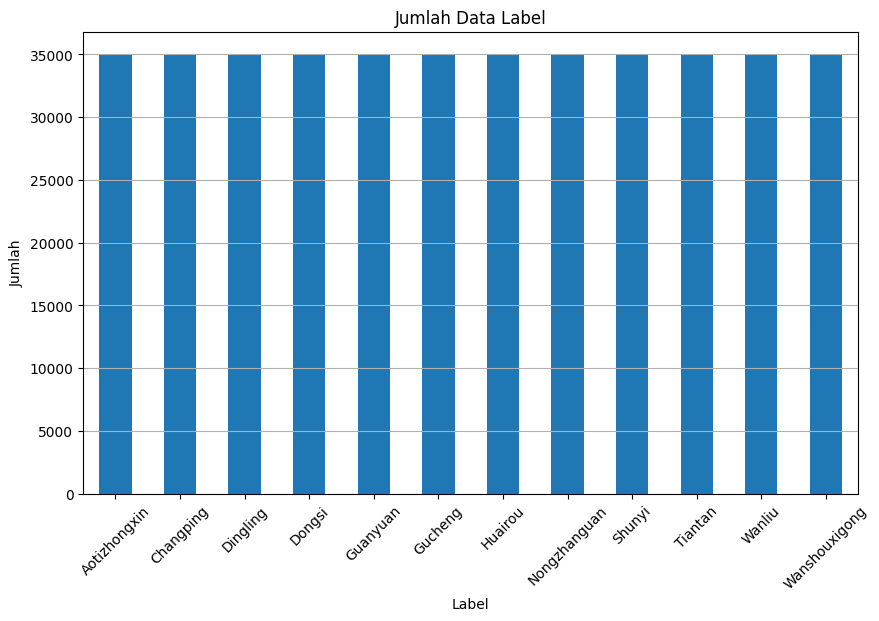

In [3]:
label_counts = combined_df['station'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Jumlah Data Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Informasi dataframe untuk mengecek apabila ada data yang bukan numerik, ditemukan 2 fitur yang bertipe object

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


Mengecek data apakah ada data yang na, ditemukan 12 fitur memiliki data na

In [5]:
combined_df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Mengecek data apakah ada data yang duplikat, tidak ditemukan data duplikat

In [6]:
combined_df.duplicated().sum()

0

Deskripsi dari dataframe

In [7]:
combined_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Melakukan box plot untuk menganalisis outlier

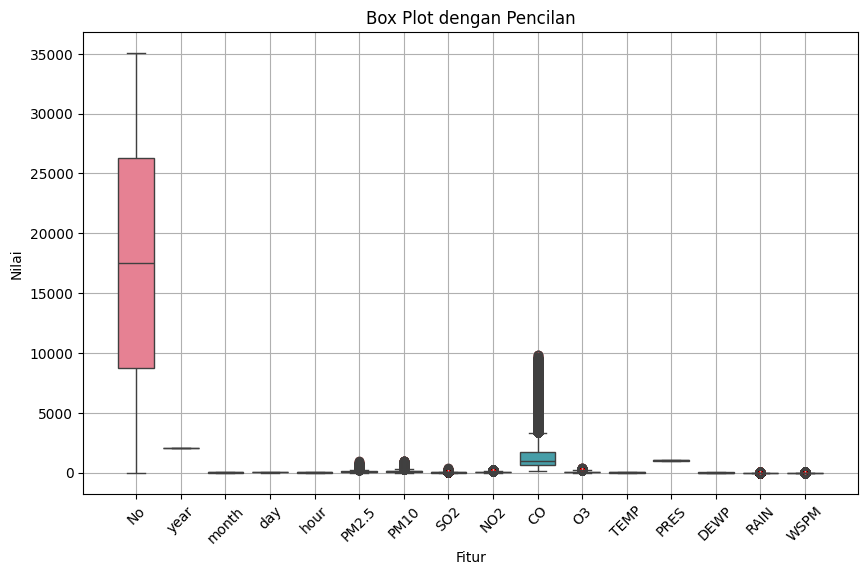

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title("Box Plot dengan Pencilan")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.grid(True)

# Mark outlier with red color
for i, col in enumerate(numeric_cols.columns):
    series = df[col]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    if not outliers.empty:
        plt.scatter([i] * len(outliers), outliers, color='red', alpha=0.5)

plt.show()

Membuat dictionary yang fitur-fitur dan nilai-nilai outliernya

In [9]:
outliers_dict = {}

for col in numeric_cols.columns:
    series = df[col]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outliers_dict[col] = outliers.tolist()

print(outliers_dict)

{'No': [], 'year': [], 'month': [], 'day': [], 'hour': [], 'PM2.5': [400.0, 410.0, 421.0, 404.0, 398.0, 411.0, 433.0, 414.0, 428.0, 423.0, 490.0, 482.0, 468.0, 510.0, 478.0, 416.0, 437.0, 407.0, 407.0, 408.0, 424.0, 481.0, 500.0, 534.0, 551.0, 586.0, 623.0, 618.0, 607.0, 605.0, 578.0, 594.0, 560.0, 484.0, 425.0, 423.0, 420.0, 423.0, 409.0, 413.0, 396.0, 556.0, 457.0, 597.0, 704.0, 616.0, 655.0, 588.0, 508.0, 486.0, 427.0, 517.0, 511.0, 480.0, 453.0, 457.0, 462.0, 467.0, 473.0, 498.0, 469.0, 458.0, 443.0, 437.0, 436.0, 408.0, 405.0, 396.0, 401.0, 401.0, 478.0, 478.0, 475.0, 476.0, 434.0, 441.0, 435.0, 452.0, 452.0, 475.0, 501.0, 512.0, 499.0, 453.0, 402.0, 450.0, 557.0, 515.0, 480.0, 407.0, 422.0, 493.0, 464.0, 456.0, 456.0, 448.0, 440.0, 428.0, 452.0, 478.0, 470.0, 485.0, 485.0, 479.0, 457.0, 402.0, 525.0, 402.0, 400.0, 423.0, 427.0, 397.0, 414.0, 403.0, 433.0, 557.0, 592.0, 646.0, 687.0, 687.0, 664.0, 669.0, 664.0, 618.0, 507.0, 475.0, 462.0, 455.0, 477.0, 459.0, 512.0, 513.0, 517.0, 

Memberikan output fitur-fitur mana saja yang memiliki output

In [10]:
outliers_dict = {}
outliers_feature = []

for col in numeric_cols.columns:
    series = df[col]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    if not outliers.empty:
        outliers_dict[col] = outliers.tolist()

print("Fitur dengan outlier:")
for col in outliers_dict:
    print(col)
    outliers_feature.append(col)


Fitur dengan outlier:
PM2.5
PM10
SO2
NO2
CO
O3
RAIN
WSPM


### Cleaning Data

Membersihkan feature arah mata angin atau WD (wind direction) dengan modus karena data kategorikal

In [11]:
combined_df['wd'].fillna(combined_df['wd'].mode()[0], inplace=True)

Melakukan encode agar data dapat lebih mudah diolah oleh python maupun model machine learning di proses yang akan datang

In [12]:
label_encoder_station = LabelEncoder()
combined_df['station'] = label_encoder_station.fit_transform(combined_df['station'])

label_encoder_wd = LabelEncoder()
combined_df['wd'] = label_encoder_wd.fit_transform(combined_df['wd'])

combined_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


Mengisi nilai na dengan rata-rata masing-masing feature pada masing-masing station

In [13]:
stations = combined_df['station'].unique()

for station in stations:
    station_data = combined_df[combined_df['station'] == station]
    station_means = station_data.mean()
    print(station_means)
    combined_df.loc[combined_df['station'] == station] = station_data.fillna(station_means)

year       2014.662560
month         6.522930
day          15.729637
hour         11.500000
PM2.5        82.773611
PM10        110.060391
SO2          17.375901
NO2          59.305833
CO         1262.945145
O3           56.353358
TEMP         13.584607
PRES       1011.846920
DEWP          3.123062
RAIN          0.067421
wd            6.535735
WSPM          1.708496
station       0.000000
dtype: float64
year       2014.662560
month         6.522930
day          15.729637
hour         11.500000
PM2.5        71.099743
PM10         94.657871
SO2          14.958906
NO2          44.182086
CO         1152.301345
O3           57.940003
TEMP         13.686111
PRES       1007.760278
DEWP          1.505495
RAIN          0.060366
wd            6.600673
WSPM          1.853836
station       1.000000
dtype: float64
year       2014.662560
month         6.522930
day          15.729637
hour         11.500000
PM2.5        65.989497
PM10         83.739723
SO2          11.749650
NO2          27.585467
CO  

Mengecek apakah masih ada fitur yang memiliki nilai na, tidak ditemukannya na setelah mengisinya dengan mean pada masing-masing station

In [14]:
combined_df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [15]:
combined_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,7,2.4,11
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,14,0.9,11
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,7,1.1,11
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,6,1.2,11


Melakukan z-score pada masing-masing fitur yang memiliki outlier dengan threshold 3

In [16]:
z_scores = stats.zscore(combined_df)

threshold = 3

combined_df = combined_df[(z_scores < threshold).all(axis=1)]

print("DataFrame setelah menghapus outlier:")
combined_df

DataFrame setelah menghapus outlier:


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0
5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,3,3.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,7,2.4,11
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,14,0.9,11
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,7,1.1,11
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,6,1.2,11


Mengaplikasikan fungsi deteksi outlier pada masing-masing fitur, tidak ditemukannya outlier pada semua fitur

In [17]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers = combined_df.apply(detect_outliers_iqr)

print("Hasil deteksi outlier:")
print(outliers.any().all())

Hasil deteksi outlier:
False


## Exploratory Data Analysis (EDA)

### Explore ...

Mengkorelasikan masing-masing fitur pada polusi bertipe PM10, jika correlation lebih dari sama dengan 0.1 maka akan dimasukkan ke list correlated_features

In [18]:
correlated_features = []

for column in combined_df.columns[6:-1]:
    correlation = combined_df[column].corr(combined_df['PM10'])
    if correlation >= 0.1:
        correlated_features.append(column)
    print(f"Korelasi antara {column} dan PM10:", correlation)

Korelasi antara SO2 dan PM10: 0.444958359715284
Korelasi antara NO2 dan PM10: 0.6145882439980197
Korelasi antara CO dan PM10: 0.6556133745772754
Korelasi antara O3 dan PM10: -0.08962282378459614
Korelasi antara TEMP dan PM10: -0.001179507151949584
Korelasi antara PRES dan PM10: -0.09034494237519915
Korelasi antara DEWP dan PM10: 0.15497458012310458
Korelasi antara RAIN dan PM10: -0.05361908643907121
Korelasi antara wd dan PM10: -0.009516782797122338
Korelasi antara WSPM dan PM10: -0.2163302059222472


Sama dengan kode sebelumnya namun dengan PM2.5, karena yang berada lebih dari 0.1 itu sama dengan PM10 maka tidak perlu membuat list baru

In [19]:
for column in combined_df.columns[6:-1]:
    correlation = combined_df[column].corr(combined_df['PM2.5'])
    print(f"Korelasi antara {column} dan PM2.5:", correlation)

Korelasi antara SO2 dan PM2.5: 0.44259410539925403
Korelasi antara NO2 dan PM2.5: 0.5852617083913119
Korelasi antara CO dan PM2.5: 0.7359912908768032
Korelasi antara O3 dan PM2.5: -0.12235459198471882
Korelasi antara TEMP dan PM2.5: -0.0347435670925414
Korelasi antara PRES dan PM2.5: -0.05298788075623241
Korelasi antara DEWP dan PM2.5: 0.20110626289786168
Korelasi antara RAIN dan PM2.5: -0.027227954384743822
Korelasi antara wd dan PM2.5: -0.05258803578625696
Korelasi antara WSPM dan PM2.5: -0.27590665073244103


Lakukan inverse pada label yang telah diencode agar dapat memudahkan visualisasi data nantinya

In [20]:
station_inverse = []

for i in range(0, 12):
    label = label_encoder_station.inverse_transform([i])
    station_inverse.append(label[0])

print(station_inverse)

['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']


Membuat dictionary berdasarkan station yang berisikan mean PM2.5 dan PM10 pada masing-masing station

In [21]:
# Buat dictionary untuk menampung rata-rata PM2.5 dan PM10 untuk setiap stasiun
station_means = {}

# Iterasi melalui setiap stasiun
for station in combined_df['station'].unique():
    # Filter data berdasarkan stasiun
    station_data = combined_df[combined_df['station'] == station]
    
    # Hitung rata-rata PM2.5 dan PM10
    mean_PM2_5 = station_data['PM2.5'].mean()
    mean_PM10 = station_data['PM10'].mean()
    
    # Tambahkan nilai ke dalam dictionary
    station_means[station] = [mean_PM2_5, mean_PM10]

# Inisialisasi dictionary untuk menyimpan nilai baru
station_means_renamed = {}

# Iterasi melalui setiap stasiun
for station, values in station_means.items():
    # Ambil nilai baru dari station_inverse
    new_key = station_inverse[int(station)]
    
    # Tambahkan nilai baru ke dalam dictionary baru
    station_means_renamed[new_key] = values

# Print dictionary dengan kunci yang telah diganti
for station, values in station_means_renamed.items():
    print(f"Stasiun {station}: Mean PM2.5 = {values[0]}, Mean PM10 = {values[1]}")


Stasiun Aotizhongxin: Mean PM2.5 = 70.6237965177318, Mean PM10 = 95.64873783078536
Stasiun Changping: Mean PM2.5 = 63.99586802760033, Mean PM10 = 85.10433551454476
Stasiun Dingling: Mean PM2.5 = 61.1294741489595, Mean PM10 = 76.99609324694374
Stasiun Dongsi: Mean PM2.5 = 74.4288220658446, Mean PM10 = 95.82484373275737
Stasiun Guanyuan: Mean PM2.5 = 71.90291139278872, Mean PM10 = 95.97612186249157
Stasiun Gucheng: Mean PM2.5 = 73.35674832867909, Mean PM10 = 106.59252358671563
Stasiun Huairou: Mean PM2.5 = 64.24363774009252, Mean PM10 = 84.22372909984237
Stasiun Nongzhanguan: Mean PM2.5 = 71.1249027682963, Mean PM10 = 92.89624236712876
Stasiun Shunyi: Mean PM2.5 = 70.77216935645453, Mean PM10 = 88.60364914490825
Stasiun Tiantan: Mean PM2.5 = 72.96281293781664, Mean PM10 = 94.8421174118865
Stasiun Wanliu: Mean PM2.5 = 70.69625419640354, Mean PM10 = 95.8602135174745
Stasiun Wanshouxigong: Mean PM2.5 = 72.37399346932669, Mean PM10 = 97.15333964077655


Mencari station paling berpolusi dan paling sedikit polusi dengan parameter PM2.5 dan PM10

In [22]:
# Inisialisasi variabel untuk menyimpan stasiun paling berpolusi dan paling sedikit berpolusi
most_polluted_station = None
least_polluted_station = None

# Inisialisasi variabel untuk menyimpan nilai PM2.5 dan PM10 terpolusi dan tidak terpolusi
max_PM2_5 = 0
max_PM10 = 0
min_PM2_5 = float('inf')
min_PM10 = float('inf')

# Iterasi melalui dictionary station_means_renamed
for station, values in station_means_renamed.items():
    # Periksa apakah nilai PM2.5 dan PM10 melebihi nilai tertinggi atau lebih rendah dari nilai terendah yang diketahui
    if values[0] > max_PM2_5:
        max_PM2_5 = values[0]
        most_polluted_station = station
    if values[1] > max_PM10:
        max_PM10 = values[1]
        most_polluted_station = station
    if values[0] < min_PM2_5:
        min_PM2_5 = values[0]
        least_polluted_station = station
    if values[1] < min_PM10:
        min_PM10 = values[1]
        least_polluted_station = station

# Print hasil
print(f"Stasiun paling berpolusi (berdasarkan PM2.5): {most_polluted_station}")
print(f"Stasiun paling berpolusi (berdasarkan PM10): {most_polluted_station}")
print(f"Stasiun paling sedikit berpolusi (berdasarkan PM2.5): {least_polluted_station}")
print(f"Stasiun paling sedikit berpolusi (berdasarkan PM10): {least_polluted_station}")

Stasiun paling berpolusi (berdasarkan PM2.5): Gucheng
Stasiun paling berpolusi (berdasarkan PM10): Gucheng
Stasiun paling sedikit berpolusi (berdasarkan PM2.5): Dingling
Stasiun paling sedikit berpolusi (berdasarkan PM10): Dingling


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Menggunakan plot heatmap untuk memvisualisasikan hubungan polusi PM2.5 dan PM10 dengan fitur lainnya termasuk antar polusi

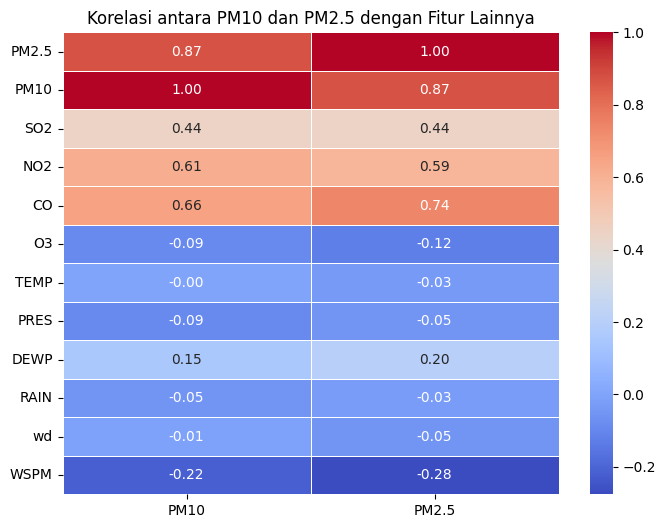

In [28]:
# Filter data untuk fitur yang berkorelasi dengan PM10
correlated_df = combined_df.loc[:, 'PM2.5':'WSPM']  # Menggunakan .loc[] untuk memilih kolom berdasarkan nama

# Hitung korelasi antar fitur
correlation_matrix = correlated_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['PM10', 'PM2.5']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara PM10 dan PM2.5 dengan Fitur Lainnya')
plt.show()

Menyimpan objek correlation_matrix ke storage os untuk ditampilkan di streamlit nantinya dan ukuran file yang lebih kecil dibanding csv agar dapat diterima oleh github

In [ ]:
with open("D:\\Downloads\\Submission Dicoding\\correlation_matrix.pkl", "wb") as f:
    pickle.dump(correlation_matrix, f)

### Pertanyaan 2:

Memvisualisasikan data berdasarkan station dengan polusi udara dari mean PM10 dan PM2.5 masing-masing station

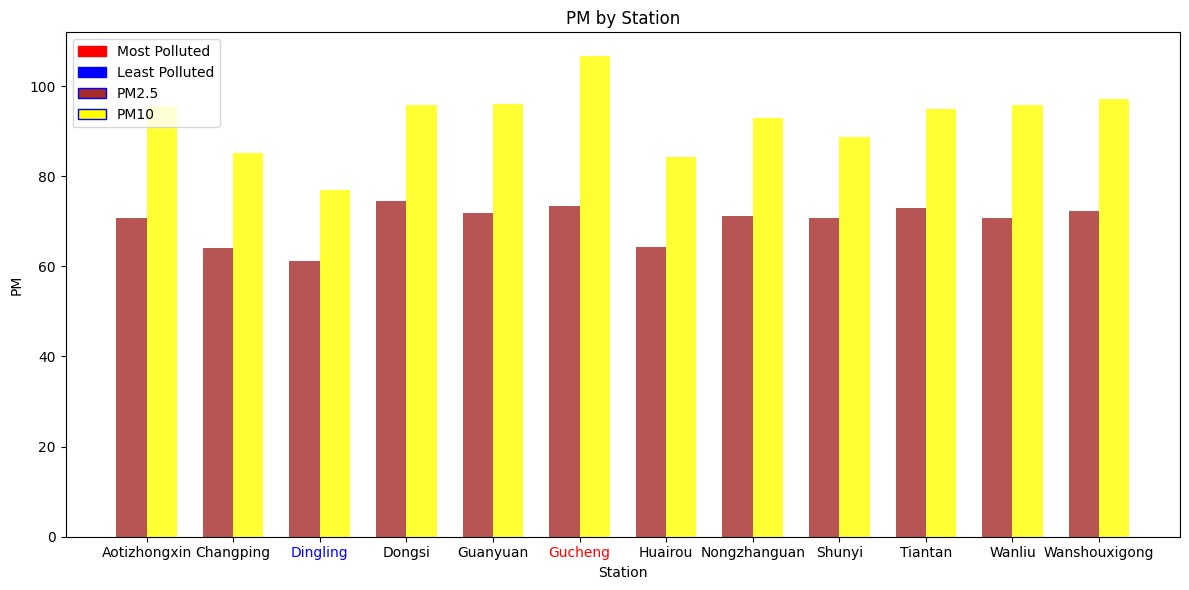

In [29]:
labels = list(station_means_renamed.keys())
values1 = [val[0] for val in station_means_renamed.values()]  
values2 = [val[1] for val in station_means_renamed.values()]

x = range(len(station_means_renamed))

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
opacity = 0.8

bars1 = plt.bar(x, values1, bar_width, alpha=opacity, color='brown', label='PM2.5')
bars2 = plt.bar([p + bar_width for p in x], values2, bar_width, alpha=opacity, color='yellow', label='PM10')

for i, label in enumerate(labels):
    if label == most_polluted_station:
        ax.get_xticklabels()[i].set_color('red')
    elif label == least_polluted_station:
        ax.get_xticklabels()[i].set_color('blue')

plt.xlabel('Station')
plt.ylabel('PM')
plt.title('PM by Station')
plt.xticks([p + 0.5 * bar_width for p in x], labels)
legend_elements = [Patch(facecolor='red', edgecolor='red', label='Most Polluted'),
                   Patch(facecolor='blue', edgecolor='blue', label='Least Polluted'),
                   Patch(facecolor='brown', edgecolor='blue', label='PM2.5'),
                   Patch(facecolor='yellow', edgecolor='blue', label='PM10'),
                   ]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

Menyimpan objek dictionary station_means_renamed ke storage os untuk ditampilkan di streamlit nantinya dan ukuran file yang lebih kecil dibanding csv agar dapat diterima oleh github

In [ ]:
with open("D:\\Downloads\\Submission Dicoding\\station_means_renamed_dict.pkl", "wb") as f:
    pickle.dump(station_means_renamed, f)

## Conclusion

Pertanyaan 1

1. Terdapat korelasi yang sangat tinggi antara PM2.5 dan PM10, seperti yang ditunjukkan oleh nilai 0.87. Ini menunjukkan bahwa ketika tingkat PM10 berubah, tingkat PM2.5 cenderung berubah dengan cara yang serupa.

2. Baik PM10 maupun PM2.5 menunjukkan korelasi positif sedang hingga kuat dengan CO (Karbon Monoksida), NO2 (Nitrogen Dioksida), dan SO2 (Sulfur Dioksida), dengan nilai berkisar antara 0.44 dan 0.74. Ini mengindikasikan bahwa konsentrasi yang lebih tinggi dari PM10 dan PM2.5 sering kali terkait dengan konsentrasi yang lebih tinggi dari gas-gas tersebut.

3. Ozon (O3) memiliki korelasi negatif yang sedikit dengan baik PM10 maupun PM2.5, yang menyiratkan bahwa tingkat ozon yang lebih tinggi mungkin terkait dengan konsentrasi materi partikulat yang lebih rendah.

4. Suhu (TEMP), tekanan (PRES), dan arah angin (wd) memiliki korelasi negatif yang sangat rendah dengan PM10 dan PM2.5, menunjukkan hampir tidak ada hubungan linear.

5. Kecepatan angin (WSPM) menunjukkan korelasi negatif yang sedikit hingga sedang dengan PM10 dan PM2.5, yang bisa berarti bahwa kecepatan angin yang lebih tinggi mungkin terkait dengan tingkat materi partikulat yang lebih rendah karena dispersi.

6. Hujan (RAIN) dan titik embun (DEWP) memiliki korelasi yang sangat rendah hingga sedikit positif dengan PM10 dan PM2.5, tetapi korelasi ini sangat lemah sehingga menunjukkan sedikit atau tidak ada hubungan linear.

Pertanyaan 2

1. Stasiun yang bernama sebagai "Gucheng" memiliki tingkat PM2.5 dan PM10 yang tertinggi yang tercatat, menjadikannya stasiun "Paling Terpolusi".

2. Stasiun yang bernama sebagai "Dingling" memiliki tingkat PM2.5 dan PM10 yang terendah yang tercatat, sehingga stasiun ini ditetapkan sebagai "Paling Sedikit Terpolusi."

3. Untuk sebagian besar stasiun, tingkat PM10 secara konsisten lebih tinggi daripada tingkat PM2.5.

4. Tingkat materi polusi bervariasi secara signifikan di berbagai stasiun. Misalnya, sementara "Gucheng" menunjukkan tingkat polusi yang sangat tinggi, "Dingling" menunjukkan tingkat yang jauh lebih rendah.

5. Grafik menunjukkan tren umum di mana beberapa stasiun memiliki tingkat PM2.5 dan PM10 yang relatif serupa, sementara yang lain memiliki perbedaan yang lebih jelas antara kedua ukuran materi polusi ini.